# Computer Vision 

### Computer vision libraries in PyTorch 

*     torchVision - Base domain library for PyTorch in computer vision 
*     torchVision.datasets - get datasets and data loading functions for computer visions
*     torchVision.models - get pretrained computer visions models that you can leverage for your problems 
*     torchVision.transforms - functions for manupulating your vision data to be sutiable for using ml model 
*     torh.utils.data.Dataset - base dataset class for PyTorch
*     torch.utils.data.Dataloader - creates a python iterable over dataset

In [94]:
## Import PyTorch 
import torch 
from torch import nn

#Import TorchVision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#Import matplotlib 
import matplotlib.pyplot as plt


# check version 
print(f'torch Version:  {torch.__version__}')
print(f'torchvision version: {torchvision.__version__}')

torch Version:  2.1.2+cu118
torchvision version: 0.16.2+cu118


### Getting the dataset 

The dataset we'll be using is FashionMNIST from torchVision.dataset

In [95]:
#* 
#* Setup training data 
training_data = datasets.FashionMNIST(root="data",
                                      train=True,
                                      download=True,
                                      transform=torchvision.transforms.ToTensor(),
                                      target_transform=None)

test_data = datasets.FashionMNIST(root='data',
                                  train=False,
                                  download=True,
                                  transform=torchvision.transforms.ToTensor(),
                                  target_transform=None
                                  )

In [96]:
len(training_data),len(test_data)

(60000, 10000)

In [97]:
# See the first training example 
image, label = training_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [98]:
class_names = training_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [99]:
class_to_idx = training_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [100]:
training_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [101]:
#* Check the shape of our images 
print(f'image shape: {image.shape}, image label :{label},{class_names[label]}')

image shape: torch.Size([1, 28, 28]), image label :9,Ankle boot


### Visualizing our data

image shpae : torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

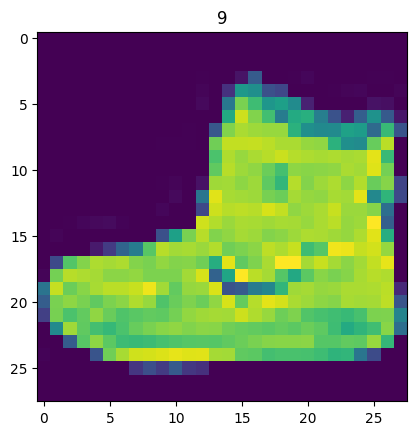

In [102]:
image, label = training_data[0]
print(f'image shpae : {image.shape}')
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

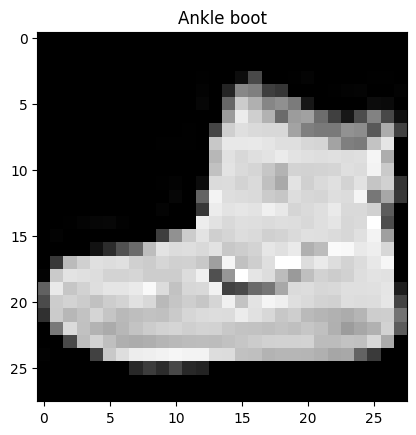

In [103]:
plt.imshow(image.squeeze() , cmap='gray')
plt.title(class_names[label])

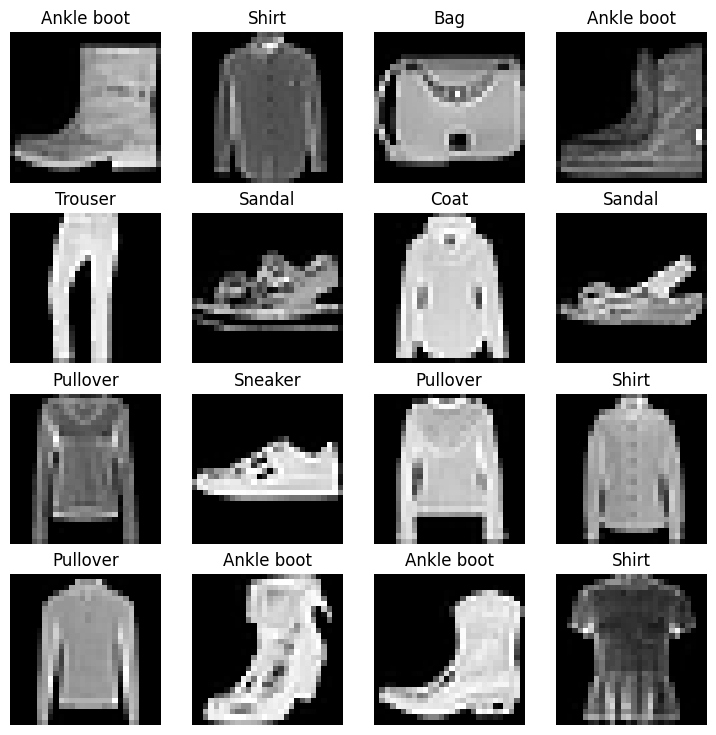

In [104]:
# plot random images 
RANDOM_SEED = 42 
torch.manual_seed(RANDOM_SEED)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(training_data), size=[1]).item()
    img , label = training_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

### ?? 

* Do you think these items of clothing could be modeled with pure linear lines or do you think we will need non linear ones 

### Prepare data loader 

- Right now our dat is in the form of PyTorchDataset
- Dataset turns our dataset into a Python iterable. 

- More specifically, we want to turn our data into batches or mini-batches
- Why we would do this 
    * It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a random images at a time (batch size of 32).
    * It gives to neural network more changes to update its gradient per epoch. 

In [105]:
training_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [106]:
from torch.utils.data import DataLoader

In [107]:
BATCH_SIZE = 32

train_data_loader = DataLoader(dataset=training_data,
                               batch_size=BATCH_SIZE,
                               shuffle=True )

test_data_loader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False )

train_data_loader,test_data_loader


(<torch.utils.data.dataloader.DataLoader at 0x26b0b4784f0>,
 <torch.utils.data.dataloader.DataLoader at 0x26b0ac235e0>)

In [108]:
print(f'Data Loader: {train_data_loader, test_data_loader}')
print(f'Length of Train Data Loader: {len(train_data_loader)} bathces size {BATCH_SIZE}')
print(f'Length of Test Data Loader: {len(test_data_loader)} bathces size {BATCH_SIZE}')

Data Loader: (<torch.utils.data.dataloader.DataLoader object at 0x0000026B0B4784F0>, <torch.utils.data.dataloader.DataLoader object at 0x0000026B0AC235E0>)
Length of Train Data Loader: 1875 bathces size 32
Length of Test Data Loader: 313 bathces size 32


In [109]:
#* 
#* check out what is inside of the training data loader 
train_features_batch , train_labels_batch = next(iter(train_data_loader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image_shape : torch.Size([1, 28, 28]), label:6, label shape:0


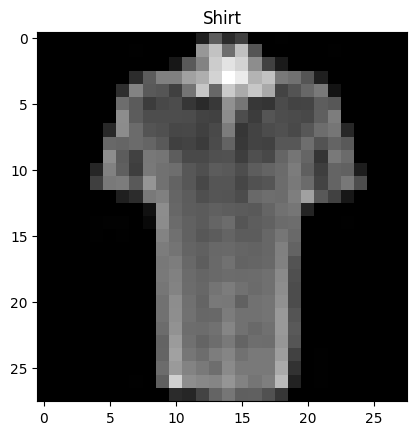

In [110]:
#* Show a sample 
torch.manual_seed(RANDOM_SEED)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])

print(f'image_shape : {img.shape}, label:{label}, label shape:{len(label.shape)}')


### Model 0: Build a baseline model 

When starting to build a series of machine learning modelling experiments, it is best practice to start with a baseline model

A baseline model is a simple model you will try and improve upon with subsequent models/experiments 

In other words : start simple and complexity when necessary 

### Create a flatten layer and see what is it 

In [111]:
flatten_layer = nn.Flatten()

x = train_features_batch[0]
x.shape

#* flatten the x 
output = flatten_layer(x) 

print(f"shape before flattening : {x.shape}")
print(f'shape after flattening : {output.shape}')



shape before flattening : torch.Size([1, 28, 28])
shape after flattening : torch.Size([1, 784])


In [112]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [113]:
from torch import nn 
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_shape)   
        )
        
    def forward(self, x):
        return self.layer_stack(x)
    

In [114]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)


torch.Size([1, 1, 28, 28])

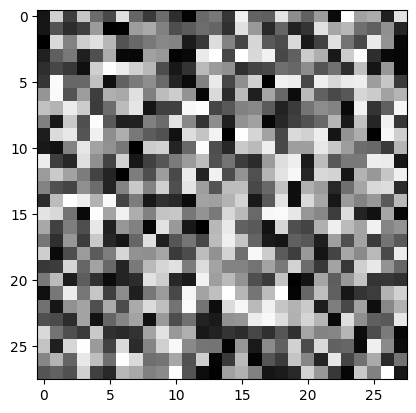

In [115]:
dummy_x = torch.rand([1,1,28,28])
print(model_0(dummy_x))
plt.imshow(dummy_x.squeeze(),cmap='gray')
dummy_x.shape

In [116]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [117]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

### Set up optimizer , loss function and evaluation matrics 

* Loss Function = Since we are working with multiclass data, our loss function will be nn.CrossEntropyLoss
* Optimizer - our optimizer is torch.optim.SGD() for stochastic gradient descent. 
* Evaluation metrics - since we are working on classification problem lets use accuracy as our eval metric 

In [118]:
import requests 
from pathlib import Path

if(Path('helper_functions.py').is_file()):
    print("file already downloaded so skipping download")
else:
    print('Downloading helper_functions.py')
    request =requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_functions.py','wb') as f:
        f.write(request.content)
        
    
from helper_functions import plot_predictions, plot_decision_boundary

file already downloaded so skipping download


In [119]:

#*Set up loss function and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

### Creating a function to time our expreiment 

* Machine learning is very experimenting two of the things you should track
    * Model's Performance 
    * How Fast it runs



In [120]:
from timeit import default_timer as timer

def print_train_time(start:float, end:float, device: torch.device=None):
    """Prints difference between start and end time 
    """
    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [121]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time,end=end_time,device='cpu')

Train time on cpu: 0.000 seconds


2.169999061152339e-05

### Training Loop

1. Loop through epochs 
2. Loop through training batches, perform training steps, calculate train loss for per batchs 
3. Loop through testing batches, perform testing steps, calculate the test loss per batch 
4. Print out what is happening
5. Time it all 

In [122]:
!pip install tqdm

In [123]:
from tqdm.auto import tqdm

# Set the seed and start the timer 
torch.manual_seed(RANDOM_SEED)
train_time_starts_on_cpu = timer()

# Set the number of epochs 
epochs = 3 

# Crete Training and Test Loop 
for epoch in tqdm(range(epochs)):
    print(f'Epoch:{epoch} \n-----')
    
    # Training 
    train_loss = 0
    
    # Add a loop to loop through the training batches 
    for batch, (X,y) in enumerate(train_data_loader):
        model_0.train()
        
        # print(f'batch: {batch}')
        
        #* forward pass 
        y_pred = model_0(X)
        
        #* calculate the loss 
        loss = loss_fn(y_pred,y)
        train_loss += loss          #* accumulate train loss 
        
        
        #* optimizer zero grad 
        optimizer.zero_grad()
        
        #* Loss backward 
        loss.backward()
        
        #* optimizer step 
        optimizer.step()
        
        #* print out what is happening 
        if batch % 400 == 0 :
            print(f"looked at:{batch * len(X)}/{len(train_data_loader.dataset)} samples.")
        
    #* Divide total train loss by length of train dataloader 
    train_loss /= len(train_data_loader)
    
    ##* Testing 
    
    test_loss, test_acc = 0,0 
    
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_data_loader:
            #* Forward pass 
            test_pred = model_0(X_test)
            
            #* calculate the loss 
            test_loss += loss_fn(test_pred,y_test)
            
            #* Calculate accuracy 
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
            
            
        #* calculate the test loss average per batch 
        test_loss /= len(test_data_loader)
            
        #* calculate the test acc average per batch 
        test_acc /= len(test_data_loader)
            
    #* print out what is happening 
    print(f'Train loss: {train_loss:.5f}| Test Loss: {test_loss:.5f} , Test Acc:{test_acc:.2f}% ')
    
    
#* calculate the train time 
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_starts_on_cpu,end=train_time_end_on_cpu,device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0 
-----
looked at:0/60000 samples.
looked at:12800/60000 samples.
looked at:25600/60000 samples.
looked at:38400/60000 samples.
looked at:51200/60000 samples.


 33%|███▎      | 1/3 [00:09<00:19,  9.70s/it]

Train loss: 0.90961| Test Loss: 0.62902 , Test Acc:78.63% 
Epoch:1 
-----
looked at:0/60000 samples.
looked at:12800/60000 samples.


 33%|███▎      | 1/3 [00:13<00:27, 13.54s/it]


KeyboardInterrupt: 

### Make Predictions and get Model 0 results 

In [152]:
torch.manual_seed(RANDOM_SEED)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader """
    loss, acc = 0,0
    device = next(model.parameters()).device

    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device),y.to(device)
            #* Make predictions 
            y_pred = model(X)

            #* Accumulate loss and acc values per batch 
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
            
        
        #* Scale the loss and acc to find average loss/acc per batch 
        
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc
            }
    
#* calculate model0 results on test dataset 

model_0_results = eval_model(model=model_0,data_loader=test_data_loader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_0_results
                        
            

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5900041460990906,
 'model_acc': 79.46285942492013}

### Setup some device agnostic code and train model on gpu if there is one

In [ ]:
import torch 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### Building a Better model with non-linearity 

* Lets create a model with non-linear and linear data 

In [129]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape:int,hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
            nn.ReLU()
        )
        
    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)
    
        

In [130]:
next(model_0.parameters()).device

device(type='cpu')

In [131]:
device

'cuda'

In [132]:

#* Create an instance of model1 and send the model to the device 
torch.manual_seed(RANDOM_SEED)
model_1 = FashionMNISTModelV1(input_shape=784, #* This is the output of the our flatten layer 
                              hidden_units=10,
                              output_shape=len(class_names)
                              ).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

> ### Setup loss function , optimizer and evalutaion metrics

In [133]:
from helper_functions import accuracy_fn

loss_fn1 = nn.CrossEntropyLoss() #* Measure how the model is wrong 
optimizer1 = torch.optim.SGD(params=model_1.parameters(),lr=0.01) #* tries to update our models parameters to reduce the loss 


### Functionizing training and evaluation/testing loops 

Let's create a function for:
* training loop - `train_step()` 
* testing step - `test_step()`

In [147]:
def train_step(model:torch.nn.Module, 
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device
               ):
    
    """Performs a training with model trying to learn on data loader."""
    
    train_loss, train_acc = 0, 0
    
    #* Put model into training mode 
    model.train()
    
    for batch, (X,y) in enumerate(data_loader):
        
        #* Put data on to device 
        X, y = X.to(device), y.to(device)
        
        #* Forward pass 
        y_pred = model(X)
        y_pred_prob = y_pred.argmax(dim=1)        
        
        #* calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred,y)
        train_loss += loss #* accumulate train loss 
        train_acc += accuracy_fn(y_true=y,y_pred=y_pred_prob)
        
        #* optimizer zero grad 
        optimizer.zero_grad()
        
        #* loss backward 
        loss.backward()
        
        #* optimizer step 
        optimizer.step()
        
        #* print out what is happening 
        if batch % 400 == 0:
            print(f"looked at:{batch * len(X)}/{len(train_data_loader.dataset)} samples.")
            
    #* Divide total train loss and acc by length of train dataloader 
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f'Train Loss:{train_loss:.5f}, Train Acc:{train_acc:.5f}%')

In [146]:
def test_step(model:nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
    
    """Preforms a testing loop step on model going over data"""
    test_loss,test_acc = 0,0
    
    #* put the model in eval mode 
    model.eval()
    with torch.inference_mode():
        for (X, y) in data_loader:
            
            #* send the data to the target device 
            X, y = X.to(device), y.to(device)
            
            #* forward pass 
            test_pred = model(X)
            
            #* Calculate the loss/acc
            test_loss += loss_fn(test_pred,y)
            test_acc += accuracy_fn(y_true=y, y_pred= test_pred.argmax(dim=1))
        
        #* Adjust metrics and print out what is happening 
        
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f'Test Loss: {test_loss:.5f} , Test Acc:{test_acc:.2f}% \n')
        
        
    

In [143]:
device

'cuda'

In [153]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

#* Measure the time 
from timeit import default_timer as timer 
from tqdm.auto import tqdm
train_timer_start_on_gpu = timer()

#*set epochs 
epochs = 3 

#* create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch} \n --------')
    train_step(model=model_1,
               data_loader=train_data_loader,
               loss_fn=loss_fn1,
               optimizer=optimizer1,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_1,
              data_loader=test_data_loader,
              loss_fn=loss_fn1,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_timer_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_timer_start_on_gpu,end=train_timer_end_on_gpu,device=device)
total_train_time_model_1

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
 --------
looked at:0/60000 samples.
looked at:12800/60000 samples.
looked at:25600/60000 samples.
looked at:38400/60000 samples.
looked at:51200/60000 samples.
Train Loss:0.86858, Train Acc:67.99000%


 33%|███▎      | 1/3 [00:13<00:26, 13.30s/it]

Test Loss: 0.89447 , Test Acc:66.89% 

Epoch: 1 
 --------
looked at:0/60000 samples.
looked at:12800/60000 samples.
looked at:25600/60000 samples.
looked at:38400/60000 samples.
looked at:51200/60000 samples.
Train Loss:0.86350, Train Acc:68.08167%


 67%|██████▋   | 2/3 [00:25<00:12, 12.79s/it]

Test Loss: 0.89023 , Test Acc:66.81% 

Epoch: 2 
 --------
looked at:0/60000 samples.
looked at:12800/60000 samples.
looked at:25600/60000 samples.
looked at:38400/60000 samples.
looked at:51200/60000 samples.
Train Loss:0.85809, Train Acc:68.27500%


100%|██████████| 3/3 [00:38<00:00, 12.70s/it]

Test Loss: 0.88763 , Test Acc:66.86% 

Train time on cuda: 38.099 seconds


38.09878000000026

In [149]:
model_0_results, total_train_time_model_0

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.5136751532554626,
  'model_acc': 81.9988019169329},
 30.114416900032666)

In [ ]:
### Get model1 results dictionary format


In [154]:
model_1_results = eval_model(model=model_1,data_loader=test_data_loader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8876338005065918,
 'model_acc': 66.86301916932908}

# Create a Convolutional Neural Network

In [237]:
class FashionMNISTModelV2(nn.Module):
    """Model architecture that replicates the TinyVGG model from CNN explainer website."""
    def __init__(self, 
                input_shape:int,
                hidden_units:int,
                output_shape:int):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2)))
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,out_features=output_shape)
        )
        
    def forward(self,x:torch.Tensor):
        x = self.conv_block1(x)  
        # print(f'block1 output: {x.shape}')
        x = self.conv_block2(x)
        # print(f'block2 output: {x.shape}')
        x = self.classifier(x)
        # print(f'classifier output: {x.shape}')
        
        return x 
    

In [238]:
torch.manual_seed(RANDOM_SEED)
model_2 = FashionMNISTModelV2(input_shape=1,hidden_units=10 , output_shape=len(class_names)).to(device)


# Stepping Through `nn.Conv2d()`

In [239]:

torch.manual_seed(RANDOM_SEED)

#* Create a batch of images 
images = torch.rand(size=(32,3,64,64))
test_image=images[0]

print(f'Images Batch Shape: {images.shape}')
print(f'Test Images Shape: {test_image.shape}')
print(f'Test Image: {test_image}')

Images Batch Shape: torch.Size([32, 3, 64, 64])
Test Images Shape: torch.Size([3, 64, 64])
Test Image: tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0.

In [240]:
test_image.shape

torch.Size([3, 64, 64])

In [241]:
#* Create a single conv2d layer 
conv_layer = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,stride=1,padding=1)

#* pass the data through the convolutional layer 
conv_output = conv_layer(test_image)
conv_output.shape, conv_output

(torch.Size([10, 64, 64]),
 tensor([[[-3.3371e-01, -3.3281e-01, -5.0839e-01,  ..., -2.3694e-01,
           -2.8108e-01, -3.1808e-01],
          [-3.3042e-01, -4.4324e-01, -4.2661e-01,  ..., -4.0290e-01,
           -2.5801e-01, -3.9595e-01],
          [-5.5964e-02, -5.1715e-01, -6.2803e-01,  ..., -2.6973e-01,
           -3.3916e-01, -3.8857e-01],
          ...,
          [-2.7309e-02, -3.8492e-01, -4.6536e-01,  ..., -4.6891e-01,
           -4.6570e-01, -2.2956e-01],
          [-1.9740e-01, -5.4037e-01, -1.7201e-01,  ..., -5.2281e-01,
           -5.0674e-01, -2.9564e-01],
          [-2.5090e-01, -5.9542e-01, -6.7210e-01,  ..., -5.3584e-01,
           -3.1367e-01, -2.2348e-01]],
 
         [[ 3.9225e-01,  2.5645e-01, -3.9996e-04,  ...,  3.4384e-02,
            3.2497e-01, -2.5311e-01],
          [ 2.9956e-01, -5.3156e-01, -1.8046e-01,  ...,  1.7471e-01,
           -1.2710e-01, -5.2937e-01],
          [-1.2867e-03, -1.5943e-02, -2.4883e-01,  ..., -2.7878e-01,
           -3.0863e-01, -4.368

# Stepping Through `nn.MaxPool2d()`

In [242]:
test_image.shape

torch.Size([3, 64, 64])

In [243]:
# Print out the original image shape without unsquezeed dimension
print(f'Test image original shape: {test_image.shape}')
print(f'Test image with unsqueez(dim=0) dimension: {test_image.unsqueeze(0).shape}')


#* create a sample nn.MaxPool2d() layer 
max_pool_layer = nn.MaxPool2d(kernel_size=4)

#* pass data through just the conv layer 
test_image_through_conv = conv_layer(test_image)
print(f'Shape after going through the conv layer : {test_image_through_conv.shape}')

#* pass data through maxpool layer 
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f'Shape after going through conv and maxpool layer : {test_image_through_conv_and_max_pool.shape}')


Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueez(dim=0) dimension: torch.Size([1, 3, 64, 64])
Shape after going through the conv layer : torch.Size([10, 64, 64])
Shape after going through conv and maxpool layer : torch.Size([10, 16, 16])


In [244]:
torch.manual_seed(42)

#* create a random tensor with a smaller number of dimensions to our images 
random_tensor = torch.rand(size=(1,1,2,2))

print(f'random tensor : {random_tensor}')
print(f'random tensor tensor shape: {random_tensor.shape}')

#* Create a max pool layer 
max_pool_layer = nn.MaxPool2d(kernel_size=(2))


#* pass the random tensor through the max pool layer 
max_pool_tensor = max_pool_layer(random_tensor)

#* print out new shape 
print(f'Max pool tensor : {max_pool_tensor}')
print(f'Max pool tensor shape: {max_pool_tensor.shape}')


random tensor : tensor([[[[0.8823, 0.9150],
          [0.3829, 0.9593]]]])
random tensor tensor shape: torch.Size([1, 1, 2, 2])
Max pool tensor : tensor([[[[0.9593]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


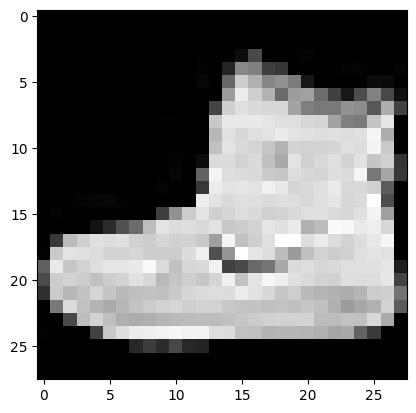

In [245]:
plt.imshow(image.squeeze(),cmap='gray')

In [246]:
rand_image_tensor = torch.tensor(torch.randn(size=(1,28,28)))
rand_image_tensor.shape


C:\Users\atesb\AppData\Local\Temp\ipykernel_9408\3119720878.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rand_image_tensor = torch.tensor(torch.randn(size=(1,28,28)))


torch.Size([1, 28, 28])

In [247]:
rand_image_tensor.unsqueeze(dim=0).shape

torch.Size([1, 1, 28, 28])

In [248]:
#* pass image through the model 
model_2(rand_image_tensor.unsqueeze(dim=0).to(device))

tensor([[ 0.0403, -0.0905,  0.0655, -0.0386,  0.0060,  0.0168,  0.0116,  0.0094,
         -0.0144, -0.0078]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Setup a loss function and optimizer for model2

In [249]:
loss_fn2 = torch.nn.CrossEntropyLoss()

optimizer2 = torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [250]:
model_2.state_dict()

OrderedDict([('conv_block1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
       

### Training and testing model2 using our training and testing fuctions 

In [253]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)

#* Measure time 
from timeit import default_timer as timer 
train_time_start_model_2 = timer()
from tqdm.auto import tqdm

#* Train and test the model 
epochs = 3 
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch} \n --------')
    train_step(model=model_2,
               data_loader=train_data_loader,
               loss_fn=loss_fn2,
               optimizer=optimizer2,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_2,
              data_loader=test_data_loader,
              loss_fn=loss_fn2,
              accuracy_fn=accuracy_fn,
              device=device)
    

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,end=train_time_end_model_2,device=device)
total_train_time_model_2


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
 --------
looked at:0/60000 samples.
looked at:12800/60000 samples.
looked at:25600/60000 samples.
looked at:38400/60000 samples.
looked at:51200/60000 samples.
Train Loss:0.35226, Train Acc:87.39000%


 33%|███▎      | 1/3 [00:15<00:31, 15.63s/it]

Test Loss: 0.36720 , Test Acc:87.18% 

Epoch: 1 
 --------
looked at:0/60000 samples.
looked at:12800/60000 samples.
looked at:25600/60000 samples.
looked at:38400/60000 samples.
looked at:51200/60000 samples.
Train Loss:0.34056, Train Acc:87.73667%


 67%|██████▋   | 2/3 [00:31<00:15, 15.60s/it]

Test Loss: 0.36135 , Test Acc:87.10% 

Epoch: 2 
 --------
looked at:0/60000 samples.
looked at:12800/60000 samples.
looked at:25600/60000 samples.
looked at:38400/60000 samples.
looked at:51200/60000 samples.
Train Loss:0.32978, Train Acc:88.18833%


100%|██████████| 3/3 [00:47<00:00, 15.72s/it]

Test Loss: 0.34409 , Test Acc:87.49% 

Train time on cuda: 47.168 seconds


47.16750749992207

In [255]:
model2_results = eval_model(model=model_2,loss_fn=loss_fn2,data_loader=test_data_loader,accuracy_fn=accuracy_fn)


In [257]:
model_0_results,model_1_results,model2_results

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.5900041460990906,
  'model_acc': 79.46285942492013},
 {'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.8876338005065918,
  'model_acc': 66.86301916932908},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.3440852165222168,
  'model_acc': 87.4900159744409})

In [258]:
import pandas as pd 

compare_results = pd.DataFrame([model_0_results,model_1_results,model2_results])

In [259]:
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.590004,79.462859
1,FashionMNISTModelV1,0.887634,66.863019
2,FashionMNISTModelV2,0.344085,87.490016


### Add training time to model comparisins 

In [265]:
compare_results["training_time"] = [total_train_time_model_0,total_train_time_model_1,total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.590004,79.462859,30.114417
1,FashionMNISTModelV1,0.887634,66.863019,38.098780
2,FashionMNISTModelV2,0.344085,87.490016,47.167507


### visualize our models results 

Text(0, 0.5, 'model')

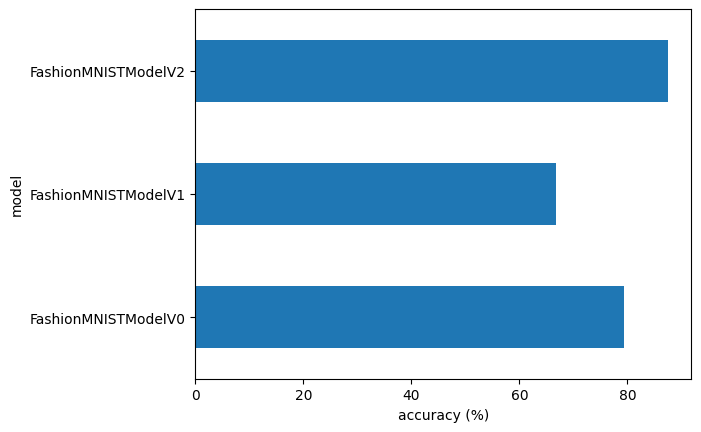

In [268]:
compare_results.set_index("model_name")["model_acc"].plot(kind='barh')
plt.xlabel("accuracy (%)")
plt.ylabel("model")

### Save the models 

In [270]:
from pathlib import Path

#* create model's directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)


#* Create model's save path 
MODEL_NAME1 = "03_model1.pth"
MODEL_NAME2 = "03_model2.pth"
MODEL_NAME3 = "03_model3.pth"
MODEL_SAVE_PATH1 = MODEL_PATH / MODEL_NAME1
MODEL_SAVE_PATH2 = MODEL_PATH / MODEL_NAME2
MODEL_SAVE_PATH3 = MODEL_PATH / MODEL_NAME3


#* Save the model_state_dict 
print(f'model saving to {model_0.state_dict(),MODEL_SAVE_PATH1}')
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH1)

print(f'model saving to {model_1.state_dict(),MODEL_SAVE_PATH2}')
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH2)

print(f'model saving to {model_2.state_dict(),MODEL_SAVE_PATH3}')
torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH3)

model saving to (OrderedDict([('layer_stack.1.weight', tensor([[ 0.0273,  0.0297, -0.0083,  ..., -0.0177,  0.0070,  0.0135],
        [-0.0188, -0.0354,  0.0186,  ...,  0.0003,  0.0033,  0.0117],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0026, -0.0156,  0.0061],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0274,  0.0321, -0.0008],
        [-0.0230,  0.0257,  0.0288,  ..., -0.0264, -0.0115, -0.0005],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0409, -0.0240,  0.0201]])), ('layer_stack.1.bias', tensor([-0.1772,  0.1125,  0.2749, -0.0885,  0.0843,  0.0938, -0.0640,  0.0804,
        -0.0977,  0.2350])), ('layer_stack.2.weight', tensor([[ 0.1657, -0.2647, -0.1158,  0.4673,  0.5742,  0.3651, -0.3997, -0.2284,
         -0.0727,  0.5901],
        [-0.3372,  0.2823, -0.2884,  0.3581,  0.0019, -0.1244, -0.8783, -0.2077,
         -0.0469, -0.6598],
        [ 0.5747,  0.1606,  0.2057,  0.2655, -0.3436,  0.2576,  0.2464,  0.0435,
         -0.6938, -0.1948],
        [ 0.5047, -0.5026

### Make and evaluate random predictions with best model

In [284]:
def make_predctions(model:torch.nn.Module,data:list,device:torch.device=device):
    pred_probs = [ ]
    model.eval()
    model.to(device)
    with torch.inference_mode():
        for sample in data:
            # prepare the samples 
            sample = torch.unsqueeze(sample,dim=0).to(device)
            
            # forward pass 
            pred_logits = model(sample)
            
            # Get the prediction probabilities 
            pred_prob = torch.softmax(pred_logits.squeeze(),dim=0)
            
            
            # Get pred prob off the gpu for further calculations 
            pred_probs.append(pred_prob.cpu())
        

    #* Stack the pred probs to turn list into a tensor 
    return torch.stack(pred_probs) 
        

In [285]:
import random
random.seed(42)

test_samples = []
test_labels = []

for sample,label in random.sample(list(test_data),k=9): # randomly select 9 images 
    test_samples.append(sample)
    test_labels.append(label)
    
    #view the test sample shapes 
test_samples[0].shape 
    

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

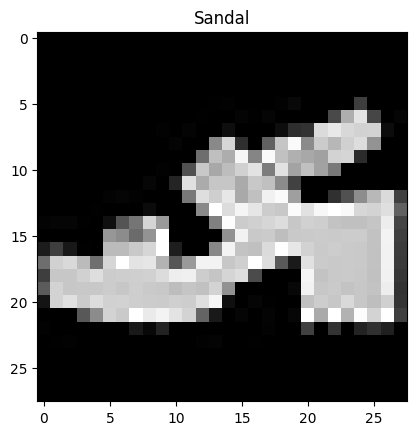

In [286]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [288]:

##* Make predictions 
pred_probabilities = make_predctions(model=model_2,data=test_samples)

##* view the first two prediction probabilities 
pred_probabilities[:2], test_labels



(tensor([[3.7625e-08, 4.6893e-11, 6.8958e-10, 5.8776e-10, 1.9163e-10, 9.9872e-01,
          1.6284e-07, 7.9490e-07, 5.8023e-06, 1.2736e-03],
         [1.3719e-02, 8.6742e-01, 6.6695e-04, 8.5018e-02, 1.7654e-02, 3.1335e-05,
          1.5015e-02, 7.7671e-06, 4.6127e-04, 2.2892e-06]]),
 [5, 1, 7, 4, 3, 0, 4, 7, 1])

In [295]:
### convert prediction probabilities to labels 
pred_classes = pred_probabilities.argmax(dim=1)
pred_classes , test_labels


(tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]), [5, 1, 7, 4, 3, 0, 4, 7, 1])

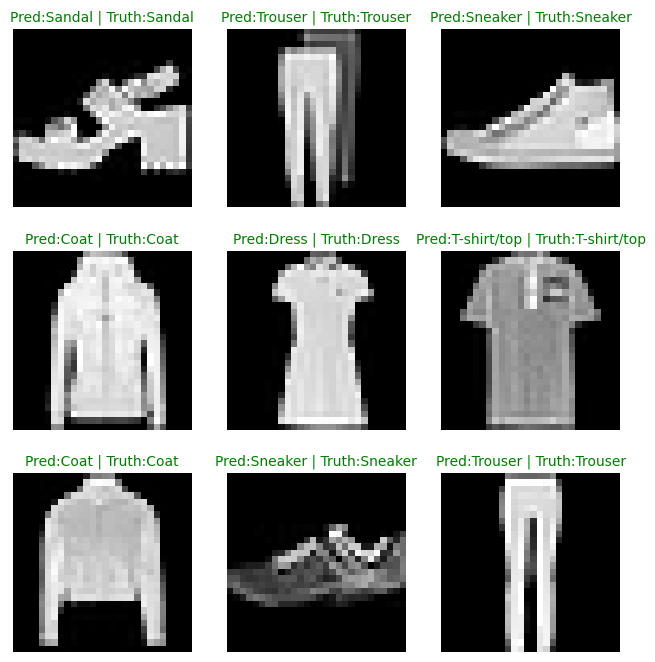

In [308]:
#* Plot predictions 
plt.figure(figsize=(9,9))
plt.subplots_adjust(bottom=.2, right=0.8, top=0.9)
nrows = 3
ncols = 3 
for i , sample in enumerate(test_samples):
    # Create a subplot for each 
    plt.subplot(nrows,ncols,i+1)
    #*plot the image 
    plt.imshow(test_samples[i].squeeze(),cmap='gray')
    
    #* find the prediction (in text form)
    pred_label = class_names[pred_classes[i]]
    
    #* get the truth labels 
    truth_label = class_names[test_labels[i]]
    
    #Create a title for the plot 
    title_text = f'Pred:{pred_label} | Truth:{truth_label}'
    
    #* Chech for equality between pred and truth and then change the color of text if needed 
    if truth_label == pred_label:
        plt.title(title_text,fontsize=10,c='g')
    else:
        plt.title(title_text,fontsize=10,c='r')
    plt.axis(False)

### Making a confusion matrix for further prediction evaluation 

1. Make predictions with our trained model on the test dataset 
2. Make a confusion matrix `torchmetrixs.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [ ]:
!pip install mlxtend

In [315]:
from tqdm.auto import tqdm
import mlxtend

In [321]:
#* make predictions with trained model 
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_data_loader,desc='Making predictions..'):
        #* Send the data and data labels to the device 
        X,y = X.to(device),y.to(device)
        
        #* Do the forward pass 
        y_logit = model_2(X)
        
        #* turn predictions from logits to prediction probs to pred labels 
        y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
        
        #* put predictions on cpu for evaluations
        y_preds.append(y_pred.cpu())
        
    # concatenate list of predictions into a tensor 
    # print(y_pred)
    y_pred_tensor = torch.cat(y_preds)
    print(len(y_pred_tensor))  
    print(y_pred_tensor)     
        

Making predictions..: 100%|██████████| 313/313 [00:01<00:00, 164.67it/s]

10000
tensor([9, 2, 1,  ..., 8, 3, 7])


In [322]:
print(f'mlxtend version : {mlxtend.__version__}')

mlxtend version : 0.23.1


In [324]:
### See if required packages is installed and if not install them 
try:
    import torchmetrics,mlxtend
    print(f'mlxtend version : {mlxtend.__version__}')
    assert int(mlxtend.__version__.split('.')[1]) >= 19, 'mlxtend version should be greater than 0.19'
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f'mlxtend version : {mlxtend.__version__}')


mlxtend version : 0.23.1


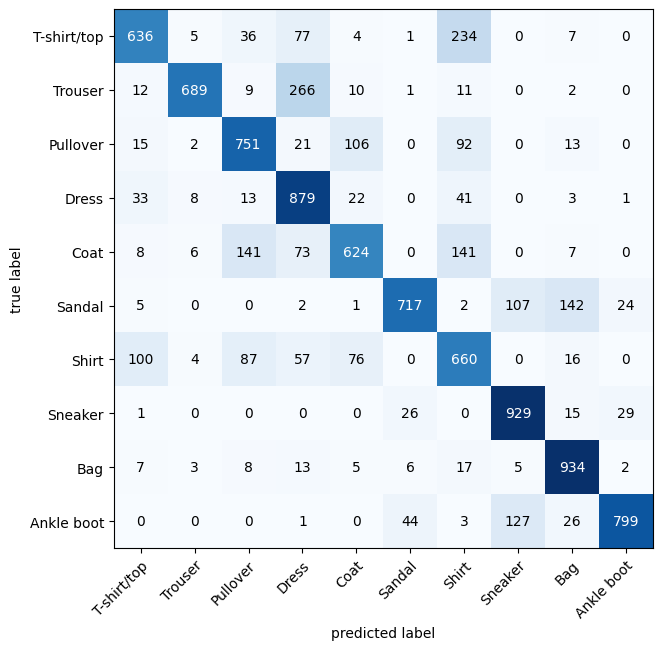

In [330]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


#* Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,target=test_data.targets)


#* plot the confusion matrix 
fig,ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

In [328]:
confmat_tensor

tensor([[636,   5,  36,  77,   4,   1, 234,   0,   7,   0],
        [ 12, 689,   9, 266,  10,   1,  11,   0,   2,   0],
        [ 15,   2, 751,  21, 106,   0,  92,   0,  13,   0],
        [ 33,   8,  13, 879,  22,   0,  41,   0,   3,   1],
        [  8,   6, 141,  73, 624,   0, 141,   0,   7,   0],
        [  5,   0,   0,   2,   1, 717,   2, 107, 142,  24],
        [100,   4,  87,  57,  76,   0, 660,   0,  16,   0],
        [  1,   0,   0,   0,   0,  26,   0, 929,  15,  29],
        [  7,   3,   8,  13,   5,   6,  17,   5, 934,   2],
        [  0,   0,   0,   1,   0,  44,   3, 127,  26, 799]])

# Save and Load the model 

In [332]:
from pathlib import Path

# Create model directory path 
MODEL_PATH = Path('models_2')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#* create model save 
MODEL_NAME = '03_PyTorch_computer_vision_model2.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME


#* Save the mdoel state dict 
print(f'Saving the model state dict ')
torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)


Saving the model state dict 


In [333]:
torch.manual_seed(42)

#* reload the model back 
model2_saved = FashionMNISTModelV2(input_shape=1,hidden_units=10,output_shape=len(class_names))

#* load in the saved state dict 
model2_saved.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#* send the model to target device 
model2_saved = model2_saved.to(device)

In [334]:
model2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3440852165222168,
 'model_acc': 87.4900159744409}

In [338]:
torch.manual_seed(42)

model2_saved.eval()

with torch.inference_mode():
    loaded_model_results = eval_model(model2_saved,test_data_loader,loss_fn2,accuracy_fn)

In [339]:
loaded_model_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3440852165222168,
 'model_acc': 87.4900159744409}

In [340]:
model2_results==loaded_model_results

True